# Capstone 2: Feature Engineering

In our previous notebook, we wrangled our data and did some EDA, in which we gained some insight on burial trends in the UK. We found 1) over 70% of end-of-life disposition was cremation for the UK population in 2019 2) cremation is cheaper than traditional burial in regards to fees 3) cremation fees for the most part are around 750-960 pounds 4) the most expensive crematoriums are located central and south of UK. The cremation fees cover year 2020. For number of cremations, we looked at 2019 (from January to end of December) and found Crematoriums in each recorded district cremated approximately 900-2000 bodies in 2019.

In this portion, our goal is to create a cleaned dataset we can use to complete the modeling step of your project. Here are the steps:

**Steps:**
1. Create dummy or indicator features for categorical variables - We may want to apply this to two different datasets that we have, and specifically to columns Cremation or Burial as well as Crematoria.
2. Addres skew in data. For 'Cremation or Burial' dataset: Age at Death and Cost to LA in pounds. For 'Crematoria': Cremations from 1 Jan-31 Dec 2019, 1 Jan-31 Dec 2020, Total Since Opening, January 2020 Basic Creamtion Fee in pounds, January 2021 Basic Cremation Fee in pounds and Total Crematorium Charges in pounds. 
3. Standardize the magnitude of numeric features using a scaler - We will want to standardize values as we likely will be using linear regression and perhaps some distance based classification models.
4. Split into testing and training datasets

### 3.0 Imports

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

import scipy
import pandas.util.testing as tm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### 3.1 Import datasets

### 3.3 Cremation or Burial dataset

In [111]:
path = r'C:\Users\yuvem\OneDrive\Documents\GitHub\Personal-Capstone-Projects\Capstone-Traditional-vs-Nontraditional-Burial-Analysis\Datasets\df.xlsx'
df = pd.read_excel(path)
df.head()

,Year,Date of Birth,Date of Death,Age at Death,Gender,Next of Kin,Cost to LA in pounds,Cremation or Burial
0,2011-2012,25.06.1957,05.04.2011,53,Male,No,214.0,Crem
1,2011-2012,12.07.1971,18.08.2011,40,Male,No,1002.0,Crem
2,2011-2012,02.07.1948,21.12.2011,63,Male,Yes,150.0,Crem
3,2012-2013,23.01.1942,26.05.2012,70,Male,Yes,187.0,Crem
4,2012-2013,11.05.1950,27.08.2012,62,Male,No,68.0,Crem


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  43 non-null     object 
 1   Date of Birth         43 non-null     object 
 2   Date of Death         43 non-null     object 
 3   Age at Death          43 non-null     int64  
 4   Gender                43 non-null     object 
 5   Next of Kin           43 non-null     object 
 6   Cost to LA in pounds  43 non-null     float64
 7   Cremation or Burial   43 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 2.8+ KB


In [113]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%', ascending=False)

,count,%
Year,0,0.0
Date of Birth,0,0.0
Date of Death,0,0.0
Age at Death,0,0.0
Gender,0,0.0
Next of Kin,0,0.0
Cost to LA in pounds,0,0.0
Cremation or Burial,0,0.0


In [114]:
df.dtypes

Year                     object
Date of Birth            object
Date of Death            object
Age at Death              int64
Gender                   object
Next of Kin              object
Cost to LA in pounds    float64
Cremation or Burial      object
dtype: object

#### Conversions 

In [115]:
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])

In [116]:
df['Date of Death'] = pd.to_datetime(df['Date of Death'])

In [117]:
df_final = df.drop(columns='Year')

In [118]:
df_final.head()

,Date of Birth,Date of Death,Age at Death,Gender,Next of Kin,Cost to LA in pounds,Cremation or Burial
0,1957-06-25,2011-05-04,53,Male,No,214.0,Crem
1,1971-12-07,2011-08-18,40,Male,No,1002.0,Crem
2,1948-02-07,2011-12-21,63,Male,Yes,150.0,Crem
3,1942-01-23,2012-05-26,70,Male,Yes,187.0,Crem
4,1950-11-05,2012-08-27,62,Male,No,68.0,Crem


In [119]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date of Birth         43 non-null     datetime64[ns]
 1   Date of Death         43 non-null     datetime64[ns]
 2   Age at Death          43 non-null     int64         
 3   Gender                43 non-null     object        
 4   Next of Kin           43 non-null     object        
 5   Cost to LA in pounds  43 non-null     float64       
 6   Cremation or Burial   43 non-null     object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 2.5+ KB


#### Convert categorical variable, Cremation or Buriall, into indicator variables or dummy

In [120]:
burial_subset = df_final[['Age at Death', 'Gender','Cost to LA in pounds', 'Cremation or Burial']]

In [121]:
burial_dummies = pd.get_dummies(burial_subset['Cremation or Burial'], prefix='Cremation or Burial') 
ds = pd.concat([burial_subset, burial_dummies], axis = 1)

In [122]:
ds

,Age at Death,Gender,Cost to LA in pounds,Cremation or Burial,Cremation or Burial_Burial,Cremation or Burial_Crem
0,53,Male,214.00,Crem,0,1
1,40,Male,1002.00,Crem,0,1
2,63,Male,150.00,Crem,0,1
3,70,Male,187.00,Crem,0,1
4,62,Male,68.00,Crem,0,1
5,81,Male,1392.00,Crem,0,1
6,44,Female,1005.00,Crem,0,1
7,79,Female,1060.00,Crem,0,1
8,60,Male,1103.00,Crem,0,1
9,84,Female,1216.00,Crem,0,1


In [123]:
ds = ds[ds['Cremation or Burial'].notna()]

In [124]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder()
encoded = one_hot.fit_transform(ds[['Cremation or Burial']])

burial_subset[one_hot.categories_[0]] = encoded.toarray()

C:\Users\yuvem\anaconda3\lib\site-packages\pandas\core\indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
<ipython-input-124-7590b3b47195>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  burial_subset[one_hot.categories_[0]] = encoded.toarray()
C:\Users\yuvem\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [125]:
burial_subset

,Age at Death,Gender,Cost to LA in pounds,Cremation or Burial,Burial,Crem
0,53,Male,214.00,Crem,0.0,1.0
1,40,Male,1002.00,Crem,0.0,1.0
2,63,Male,150.00,Crem,0.0,1.0
3,70,Male,187.00,Crem,0.0,1.0
4,62,Male,68.00,Crem,0.0,1.0
5,81,Male,1392.00,Crem,0.0,1.0
6,44,Female,1005.00,Crem,0.0,1.0
7,79,Female,1060.00,Crem,0.0,1.0
8,60,Male,1103.00,Crem,0.0,1.0
9,84,Female,1216.00,Crem,0.0,1.0


In [126]:
# Repeat for Gender
gender_dummies = pd.get_dummies(ds['Gender'], prefix='Gender') 
ds = pd.concat([ds, gender_dummies], axis = 1)
ds.head()

,Age at Death,Gender,Cost to LA in pounds,Cremation or Burial,Cremation or Burial_Burial,Cremation or Burial_Crem,Gender_Female,Gender_Male
0,53,Male,214.0,Crem,0,1,0,1
1,40,Male,1002.0,Crem,0,1,0,1
2,63,Male,150.0,Crem,0,1,0,1
3,70,Male,187.0,Crem,0,1,0,1
4,62,Male,68.0,Crem,0,1,0,1


In [127]:
ds['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [128]:
ds_ = ds.head(10)

In [129]:
ds_.head()

,Age at Death,Gender,Cost to LA in pounds,Cremation or Burial,Cremation or Burial_Burial,Cremation or Burial_Crem,Gender_Female,Gender_Male
0,53,Male,214.0,Crem,0,1,0,1
1,40,Male,1002.0,Crem,0,1,0,1
2,63,Male,150.0,Crem,0,1,0,1
3,70,Male,187.0,Crem,0,1,0,1
4,62,Male,68.0,Crem,0,1,0,1


#### Get numerical values into new dataset

In [130]:
num_set = ds.select_dtypes(include=['int', 'float'])
num_set.head()

,Cost to LA in pounds
0,214.0
1,1002.0
2,150.0
3,187.0
4,68.0


In [131]:
data = ds_[['Cost to LA in pounds', 'Cremation or Burial_Burial', 'Cremation or Burial_Crem', 'Gender_Female', 'Gender_Male']]

In [132]:
# split into inputs and outputs
X, y = data.iloc[:, :-1], ds_.iloc[:, -1]

In [133]:
print(X.shape, y.shape)

(10, 4) (10,)


#### Split - train and test set

In [134]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7, 4) (3, 4) (7,) (3,)


In [135]:
from sklearn.ensemble import RandomForestRegressor
# fit the model
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [136]:
# make predictions
y_hat = model.predict(X_test)

<AxesSubplot:xlabel='Gender_Male', ylabel='Density'>

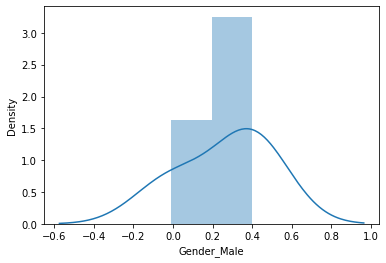

In [137]:
sns.distplot(y_hat-y_test)

#### Using Standard Scaler on numeric features

In [138]:
num_subset = df_final[['Cremation or Burial','Age at Death', 'Cost to LA in pounds']]
num_subset.head()

,Cremation or Burial,Age at Death,Cost to LA in pounds
0,Crem,53,214.0
1,Crem,40,1002.0
2,Crem,63,150.0
3,Crem,70,187.0
4,Crem,62,68.0


In [139]:
num_subset = num_subset[num_subset['Cremation or Burial'].notna()]

In [140]:
num_subset.isnull().sum()

Cremation or Burial     0
Age at Death            0
Cost to LA in pounds    0
dtype: int64

In [141]:
# Repeat splitting into train and test set
x = num_subset.iloc[:, -1].values
y = num_subset.iloc[:, 1].values

In [142]:
y

array([53, 40, 63, 70, 62, 81, 44, 79, 60, 84, 71, 67, 74, 52, 79, 52, 60,
       65, 70, 70, 83, 45, 64, 56, 85, 68, 59, 33, 56, 78, 63, 65, 65, 86,
       71, 60, 71, 68, 80, 80, 69, 58, 70], dtype=int64)

In [143]:
x

array([ 214.  , 1002.  ,  150.  ,  187.  ,   68.  , 1392.  , 1005.  ,
       1060.  , 1103.  , 1216.  , 1167.  ,  195.  , 1081.  , 1197.  ,
       1103.  , 1174.  , 1114.  ,  396.  ,  427.  ,  346.  ,    8.  ,
       1173.  , 1369.  , 1247.  ,  122.7 , 3625.  , 1313.  , 1210.  ,
       1227.  , 1562.  , 1311.  , 1209.  , 1234.  , 1637.  ,   55.  ,
       1453.  , 1271.  , 1266.  , 1142.75, 1084.25, 1317.  , 1270.  ,
       1339.  ])

In [144]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [145]:
X_train= X_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [146]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler_x = StandardScaler()
scaler_y = StandardScaler()
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [147]:
Xs = scaler_x.fit_transform(X_test)
Ys = np.squeeze(scaler_y.fit_transform(y_test.reshape(-1, 1)))

In [148]:
models = LinearRegression()
models.fit(Xs, Ys)

LinearRegression()

In [149]:
y_pred = models.predict(Xs)
y_pred

array([ 0.45029767,  0.47672182,  0.49621856, -0.35671016,  0.30103693,
       -0.35242516, -0.3938468 , -0.32385851, -0.29743436])

<AxesSubplot:ylabel='Density'>

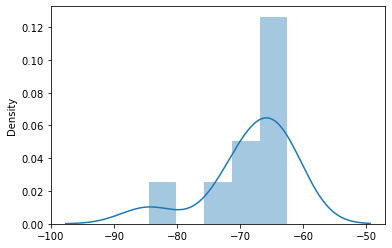

In [150]:
sns.distplot(y_pred-y_test)

### 3.4 Crematoria dataset

In [151]:
path2 = r'C:\Users\yuvem\OneDrive\Documents\GitHub\Personal-Capstone-Projects\Capstone-Traditional-vs-Nontraditional-Burial-Analysis\Datasets\xl3_dist.xlsx'
xl3 = pd.read_excel(path2)
xl3.head()

,Crematoria,Crematoria2,Direct Cremations 2019,1 Jan-31 Dec 2019,1 Jan-31 Dec 2020,Buffer,Crematoria Point 1,Crematoria Point 2,Direct Cremations 2020,Distance,Distance Label,January 2020 Basic Cremation Fee in pounds,January 2021 Basic Cremation Fee in pounds,Latitude,Latitude2,Longtitude,Longtitude2,Total Crematorium Charges in pounds,Total for County 2020,Total Since Opening
0,Alfreton (Amber Valley),Exeter & Devon,266,1434,1640,Polygon,Point,Point,266,LineString,302.295332,875.0,875.0,53.088257,50.705661,-1.394849,-3.506253,930.0,NaN,7962
1,Amersham (Chilterns),Torquay,210,3195,3597,Polygon,Point,Point,325,LineString,242.402689,630.0,650.0,51.660428,50.486224,-0.631457,-3.545360,650.0,NaN,148149
2,Aston-on-Trent (Trent Valley),Durham,8,592,857,Polygon,Point,Point,42,LineString,210.441229,729.0,729.0,52.875117,54.762450,-1.388374,-1.579883,729.0,NaN,1631
3,Aylesbury Vale,Stockton-on-Tees,17,377,762,Polygon,Point,Point,20,LineString,309.795630,645.0,645.0,51.833666,54.598684,-0.811689,-1.348015,645.0,NaN,1139
4,Barnstaple,Darlington,133,1530,1607,Polygon,Point,Point,100,LineString,423.418610,680.0,715.0,51.065627,54.558778,-4.078583,-1.586699,715.0,NaN,65947


In [152]:
xl3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Crematoria                                  60 non-null     object 
 1   Crematoria2                                 60 non-null     object 
 2   Direct Cremations 2019                      60 non-null     object 
 3   1 Jan-31 Dec 2019                           60 non-null     int64  
 4   1 Jan-31 Dec 2020                           60 non-null     int64  
 5   Buffer                                      60 non-null     object 
 6   Crematoria Point 1                          60 non-null     object 
 7   Crematoria Point 2                          60 non-null     object 
 8   Direct Cremations 2020                      60 non-null     int64  
 9   Distance                                    60 non-null     object 
 10  Distance Label  

In [153]:
xl3.isnull().sum()

Crematoria                                     0
Crematoria2                                    0
Direct Cremations 2019                         0
1 Jan-31 Dec 2019                              0
1 Jan-31 Dec 2020                              0
Buffer                                         0
Crematoria Point 1                             0
Crematoria Point 2                             0
Direct Cremations 2020                         0
Distance                                       0
Distance Label                                 0
January 2020 Basic Cremation Fee in pounds     0
January 2021 Basic Cremation Fee in pounds     0
Latitude                                       0
Latitude2                                      0
Longtitude                                     0
Longtitude2                                    0
Total Crematorium Charges in pounds            0
Total for County 2020                         46
Total Since Opening                            0
dtype: int64

In [154]:
xl3['Direct Cremations 2019'].unique()

array(['266', '210', '8', '17', '133', '197', '29', '60', '18', '287',
       '32', '26', '152', '0', '21', '125', '27', '121', 'N/R', '116',
       '74', '83', '327', '356', '50', '67', 'N/O', '25', '159', '14',
       '73', '31', '70', '1', '522', '51', '37', '58', '382', '256'],
      dtype=object)

In [155]:
xl3 = xl3[xl3['Direct Cremations 2019'] != 'N/O']
xl3['Direct Cremations 2019'].unique()

array(['266', '210', '8', '17', '133', '197', '29', '60', '18', '287',
       '32', '26', '152', '0', '21', '125', '27', '121', 'N/R', '116',
       '74', '83', '327', '356', '50', '67', '25', '159', '14', '73',
       '31', '70', '1', '522', '51', '37', '58', '382', '256'],
      dtype=object)

In [156]:
xl3 = xl3[xl3['Direct Cremations 2019'] != 'N/R']
xl3['Direct Cremations 2019'].unique()

array(['266', '210', '8', '17', '133', '197', '29', '60', '18', '287',
       '32', '26', '152', '0', '21', '125', '27', '121', '116', '74',
       '83', '327', '356', '50', '67', '25', '159', '14', '73', '31',
       '70', '1', '522', '51', '37', '58', '382', '256'], dtype=object)

array([[<AxesSubplot:title={'center':'1 Jan-31 Dec 2019'}>,
        <AxesSubplot:title={'center':'1 Jan-31 Dec 2020'}>,
        <AxesSubplot:title={'center':'Direct Cremations 2020'}>,
        <AxesSubplot:title={'center':'Distance Label'}>],
       [<AxesSubplot:title={'center':'January 2020 Basic Cremation Fee in pounds'}>,
        <AxesSubplot:title={'center':'January 2021 Basic Cremation Fee in pounds'}>,
        <AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Latitude2'}>],
       [<AxesSubplot:title={'center':'Longtitude'}>,
        <AxesSubplot:title={'center':'Longtitude2'}>,
        <AxesSubplot:title={'center':'Total Crematorium Charges in pounds'}>,
        <AxesSubplot:title={'center':'Total for County 2020'}>],
       [<AxesSubplot:title={'center':'Total Since Opening'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

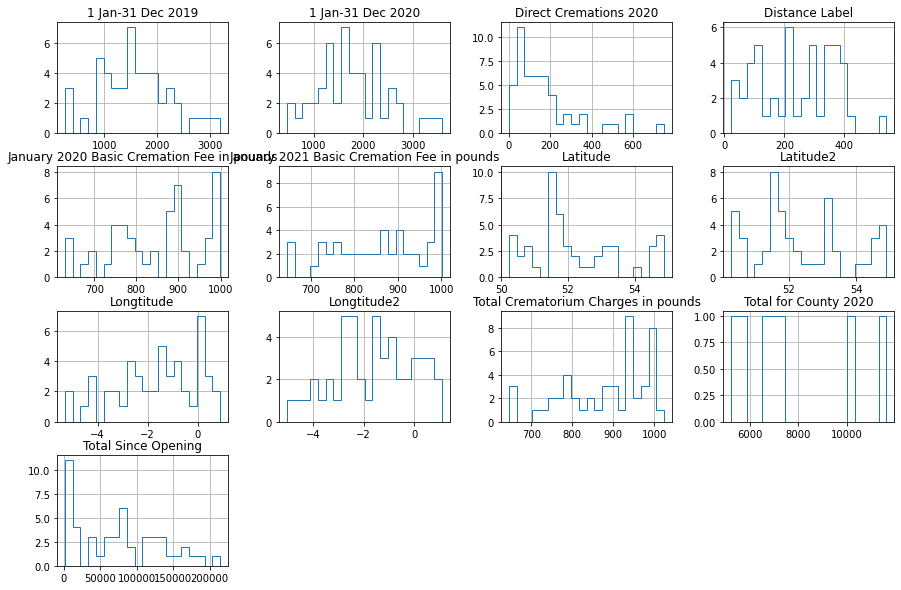

In [157]:
xl3.hist(figsize=(15,10), bins=20, histtype='step')

#### 3.5 Create Features

#### Fix skewness

(array([5., 6., 4., 1., 5., 6., 6., 9., 4., 3.]),
 array([-1.77225179, -1.42458577, -1.07691974, -0.72925372, -0.3815877 ,
        -0.03392168,  0.31374435,  0.66141037,  1.00907639,  1.35674241,
         1.70440844]),
 <BarContainer object of 10 artists>)

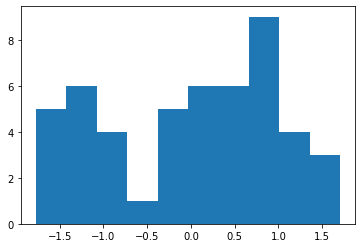

In [158]:
# Test positive skewness for Total Since Opening
powertransformer = PowerTransformer(standardize=True)

pos_skew_test = powertransformer.fit_transform(xl3[['Total Since Opening']])
plt.hist(pos_skew_test)

array([[<AxesSubplot:title={'center':'Total Since Opening'}>,
        <AxesSubplot:title={'center':'normal Total Since Opening'}>]],
      dtype=object)

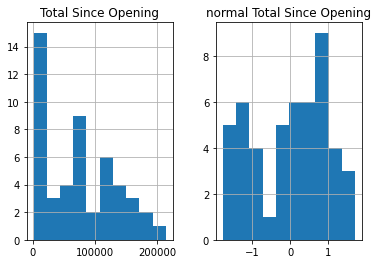

In [159]:
tot_since_open_ds = pd.DataFrame(pos_skew_test, columns=['normal Total Since Opening'])

pandas_ds = xl3[['Total Since Opening']]

test_df = pd.concat([pandas_ds, tot_since_open_ds], axis=1)
test_df.hist()

We have three more datasets that are skewed: 'January 2020 Basic Cremation Fee in pounds', 'January 2021 Basic Cremation Fee in pounds', and 'Total Crematorium Charges in pounds'. 

In [160]:
xl3_skew = xl3.drop(['Crematoria','Crematoria2', 'Buffer','Crematoria Point 1','Crematoria Point 2','Distance','Latitude', 'Latitude2','Longtitude','Longtitude2', '1 Jan-31 Dec 2019', '1 Jan-31 Dec 2020', 'Total for County 2020'], axis=1)

xl3_skew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 59
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Direct Cremations 2019                      49 non-null     object 
 1   Direct Cremations 2020                      49 non-null     int64  
 2   Distance Label                              49 non-null     float64
 3   January 2020 Basic Cremation Fee in pounds  49 non-null     float64
 4   January 2021 Basic Cremation Fee in pounds  49 non-null     float64
 5   Total Crematorium Charges in pounds         49 non-null     float64
 6   Total Since Opening                         49 non-null     int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 4.3+ KB


array([[<AxesSubplot:title={'center':'norm_Direct Cremations 2019'}>,
        <AxesSubplot:title={'center':'norm_Direct Cremations 2020'}>,
        <AxesSubplot:title={'center':'norm_Distance Label'}>],
       [<AxesSubplot:title={'center':'norm_January 2020 Basic Cremation Fee in pounds'}>,
        <AxesSubplot:title={'center':'norm_January 2021 Basic Cremation Fee in pounds'}>,
        <AxesSubplot:title={'center':'norm_Total Crematorium Charges in pounds'}>],
       [<AxesSubplot:title={'center':'norm_Total Since Opening'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

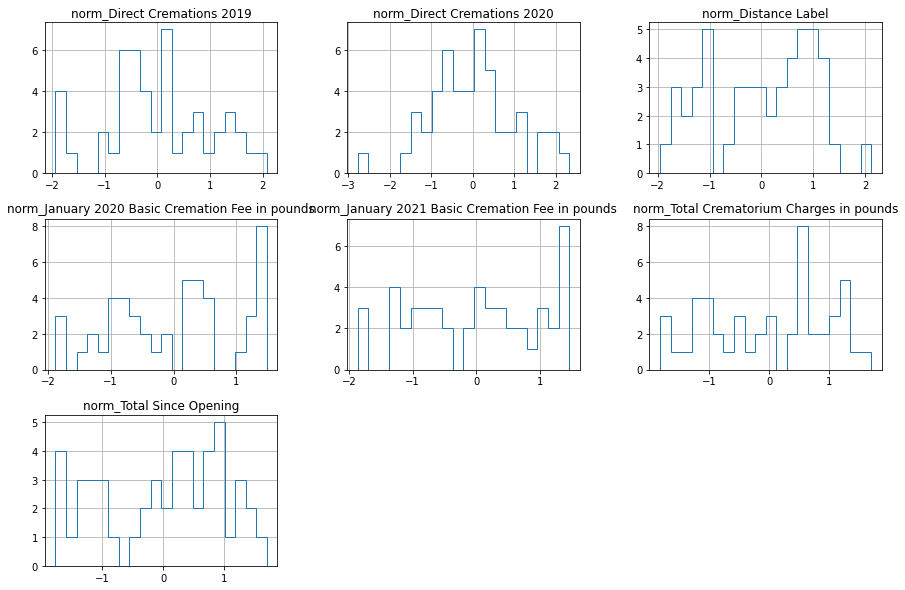

In [161]:
# Instantiate PowerTransformer
# Apply xl3_skew

powertransformer = PowerTransformer()
xl3_noskew = powertransformer.fit_transform(xl3_skew)

# create list of updated column names
col_names = xl3_skew.columns
updated_cnames = ['norm_' + i for i in col_names]

# create new df and plot histogram of all variables to see if there still is skew

xl3_noskew = pd.DataFrame(xl3_noskew, columns=updated_cnames)
xl3_noskew.hist(figsize=(15,10), bins=20,histtype='step')

In [162]:
xl3_noskew

,norm_Direct Cremations 2019,norm_Direct Cremations 2020,norm_Distance Label,norm_January 2020 Basic Cremation Fee in pounds,norm_January 2021 Basic Cremation Fee in pounds,norm_Total Crematorium Charges in pounds,norm_Total Since Opening
0,1.370624,0.812812,0.540331,0.190775,0.061802,0.393639,-1.252534
1,1.145149,1.070853,0.096480,-1.880706,-1.829606,-1.801102,1.118301
2,-1.046132,-0.991735,-0.151431,-1.121916,-1.248070,-1.390548,-1.696947
3,-0.675178,-1.486440,0.594290,-1.772586,-1.863503,-1.822774,-1.760682
4,0.739015,-0.259572,1.376722,-1.510786,-1.357497,-1.473250,0.129891
5,1.086029,1.170005,-1.003828,0.499081,0.380532,0.112994,-0.126374
6,-0.367080,0.446098,1.123285,1.441593,1.377134,1.263962,-0.253046
7,0.116476,-0.828035,-0.173276,-0.414803,-0.185207,0.573483,0.407893
8,-0.644032,-0.089733,-1.019741,-1.880706,-1.829606,-1.801102,-1.772252
9,1.445422,0.246045,1.238418,1.485949,1.424804,1.323102,-0.332031


In [163]:
xl3_noskew.dropna()

,norm_Direct Cremations 2019,norm_Direct Cremations 2020,norm_Distance Label,norm_January 2020 Basic Cremation Fee in pounds,norm_January 2021 Basic Cremation Fee in pounds,norm_Total Crematorium Charges in pounds,norm_Total Since Opening
0,1.370624,0.812812,0.540331,0.190775,0.061802,0.393639,-1.252534
1,1.145149,1.070853,0.096480,-1.880706,-1.829606,-1.801102,1.118301
2,-1.046132,-0.991735,-0.151431,-1.121916,-1.248070,-1.390548,-1.696947
3,-0.675178,-1.486440,0.594290,-1.772586,-1.863503,-1.822774,-1.760682
4,0.739015,-0.259572,1.376722,-1.510786,-1.357497,-1.473250,0.129891
5,1.086029,1.170005,-1.003828,0.499081,0.380532,0.112994,-0.126374
6,-0.367080,0.446098,1.123285,1.441593,1.377134,1.263962,-0.253046
7,0.116476,-0.828035,-0.173276,-0.414803,-0.185207,0.573483,0.407893
8,-0.644032,-0.089733,-1.019741,-1.880706,-1.829606,-1.801102,-1.772252
9,1.445422,0.246045,1.238418,1.485949,1.424804,1.323102,-0.332031


In [164]:
xl3_noskew['norm_Direct Cremations 2019'].unique()

array([ 1.37062354e+00,  1.14514867e+00, -1.04613168e+00, -6.75178351e-01,
        7.39015166e-01,  1.08602852e+00, -3.67079907e-01,  1.16476456e-01,
       -6.44031978e-01,  1.44542234e+00, -3.06042641e-01, -4.33218454e-01,
        8.53855287e-01, -1.93421753e+00, -5.57870826e-01,  6.86723624e-01,
       -4.10545899e-01,  6.59574030e-01,  6.24615943e-01,  2.70594068e-01,
        3.57861115e-01,  1.57657002e+00,  1.66385118e+00, -1.20438307e-02,
        1.96717503e-01, -4.56573747e-01,  8.93289411e-01, -7.77768978e-01,
        2.60387760e-01, -3.25875833e-01,  2.29091396e-01, -1.69476066e+00,
        2.07603724e+00,  1.67383292e-03, -2.13540831e-01,  9.21990943e-02,
        1.73740039e+00,  1.33333692e+00])

In [165]:
xl3_noskew = pd.DataFrame(xl3_noskew).fillna(0)

In [166]:
xl3_noskew = xl3_noskew.round(decimals = 3)

In [167]:
xl3_noskew

,norm_Direct Cremations 2019,norm_Direct Cremations 2020,norm_Distance Label,norm_January 2020 Basic Cremation Fee in pounds,norm_January 2021 Basic Cremation Fee in pounds,norm_Total Crematorium Charges in pounds,norm_Total Since Opening
0,1.371,0.813,0.540,0.191,0.062,0.394,-1.253
1,1.145,1.071,0.096,-1.881,-1.830,-1.801,1.118
2,-1.046,-0.992,-0.151,-1.122,-1.248,-1.391,-1.697
3,-0.675,-1.486,0.594,-1.773,-1.864,-1.823,-1.761
4,0.739,-0.260,1.377,-1.511,-1.357,-1.473,0.130
5,1.086,1.170,-1.004,0.499,0.381,0.113,-0.126
6,-0.367,0.446,1.123,1.442,1.377,1.264,-0.253
7,0.116,-0.828,-0.173,-0.415,-0.185,0.573,0.408
8,-0.644,-0.090,-1.020,-1.881,-1.830,-1.801,-1.772
9,1.445,0.246,1.238,1.486,1.425,1.323,-0.332


#### Merge unskewed data into the variables dropped

In [168]:
xl3_noskew = pd.concat([xl3[['Crematoria','Latitude', 'Longtitude', '1 Jan-31 Dec 2019', '1 Jan-31 Dec 2020']], xl3_noskew], axis=1)
xl3_noskew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 59
Data columns (total 12 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Crematoria                                       49 non-null     object 
 1   Latitude                                         49 non-null     float64
 2   Longtitude                                       49 non-null     float64
 3   1 Jan-31 Dec 2019                                49 non-null     float64
 4   1 Jan-31 Dec 2020                                49 non-null     float64
 5   norm_Direct Cremations 2019                      49 non-null     float64
 6   norm_Direct Cremations 2020                      49 non-null     float64
 7   norm_Distance Label                              49 non-null     float64
 8   norm_January 2020 Basic Cremation Fee in pounds  49 non-null     float64
 9   norm_January 2021 Basic Cremation 

Since PowerTransformer already normalizes features with mean of 0, we don't need to apply StandardScaler here.

### 3.6 Create Dummy Variables for Crematoria

In [169]:
xl3_noskew['Crematoria'].value_counts()

Derby                            1
Southend-on-Sea                  1
Cambridge                        1
Barnstaple                       1
Plymouth (Efford)                1
Plymouth (Weston Mill)           1
Redbridge                        1
Amersham (Chilterns)             1
Crewe                            1
Aston-on-Trent (Trent Valley)    1
Camborne                         1
Bracknell                        1
Bierton                          1
Bristol (South)                  1
Poole                            1
Peterborough                     1
Harlow                           1
Carlisle                         1
Exeter & Devon                   1
Alfreton (Amber Valley)          1
Barrow-in-Furness                1
Warrington                       1
Braintree                        1
Durham                           1
Darlington                       1
Truro                            1
Hartlepool                       1
Mountsett                        1
Saffron Walden (Cam 

In [170]:
# create dummy variables for Regional indicator

dummy_df = pd.get_dummies(xl3_noskew['Crematoria'])
dummy_df

,Alfreton (Amber Valley),Amersham (Chilterns),Aston-on-Trent (Trent Valley),Aylesbury Vale,Barnstaple,Barrow-in-Furness,Basildon,Bedford,Bierton,Bodmin,...,South Essex,Southend-on-Sea,Stockton-on-Tees,Torquay,Truro,Warrington,West Berkshire (Thatcham),Westerleigh,Whimple (East Devon),Widnes
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [171]:
# Merge dummy variables with unskewed data

xl3_final = pd.concat([xl3_noskew, dummy_df], axis=1)
xl3_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 59
Data columns (total 61 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Crematoria                                       49 non-null     object 
 1   Latitude                                         49 non-null     float64
 2   Longtitude                                       49 non-null     float64
 3   1 Jan-31 Dec 2019                                49 non-null     float64
 4   1 Jan-31 Dec 2020                                49 non-null     float64
 5   norm_Direct Cremations 2019                      49 non-null     float64
 6   norm_Direct Cremations 2020                      49 non-null     float64
 7   norm_Distance Label                              49 non-null     float64
 8   norm_January 2020 Basic Cremation Fee in pounds  49 non-null     float64
 9   norm_January 2021 Basic Cremation 

### 3.7 Split - train and test set

In [172]:
xl3_final_train = xl3_final[['norm_Total Crematorium Charges in pounds', 'norm_January 2020 Basic Cremation Fee in pounds','norm_January 2021 Basic Cremation Fee in pounds', 'norm_Total Since Opening']]

In [173]:
xl3_final_train = pd.DataFrame(xl3_final_train).fillna(0)

In [174]:
xl3_final_train['norm_Total Since Opening'].unique()

array([-1.253,  1.118, -1.697, -1.761,  0.13 , -0.126, -0.253,  0.408,
       -1.772, -0.332,  0.188, -1.117, -1.328,  0.976,  0.418, -1.062,
        1.319,  0.496,  0.794,  0.698,  0.116,  0.874,  1.526,  0.812,
        1.288,  0.381, -0.045, -1.209,  0.314, -1.199,  0.163, -1.296,
        0.839,  0.712,  0.302,  0.292,  0.994, -0.821, -1.578,  1.704,
        1.395, -1.713,  1.193,  0.965,  0.531, -0.949, -0.037, -0.981,
       -0.42 ,  0.   ])

In [175]:
# split into inputs and outputs
X2, y2 = xl3_final_train.iloc[:, :-1], xl3_final_train.iloc[:, -1]

In [176]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3,random_state = 1)
print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(39, 3) (18, 3) (39,) (18,)


In [177]:
X2

,norm_Total Crematorium Charges in pounds,norm_January 2020 Basic Cremation Fee in pounds,norm_January 2021 Basic Cremation Fee in pounds
0,0.394,0.191,0.062
1,-1.801,-1.881,-1.830
2,-1.391,-1.122,-1.248
3,-1.823,-1.773,-1.864
4,-1.473,-1.511,-1.357
5,0.113,0.499,0.381
6,1.264,1.442,1.377
7,0.573,-0.415,-0.185
8,-1.801,-1.881,-1.830
9,1.323,1.486,1.425


In [178]:
y2

0    -1.253
1     1.118
2    -1.697
3    -1.761
4     0.130
5    -0.126
6    -0.253
7     0.408
8    -1.772
9    -0.332
10    0.188
11   -1.117
12   -1.328
13    0.976
14    0.418
15   -1.062
16    1.319
17    0.496
18    0.794
19    0.698
20    0.116
21    0.874
22    1.526
23    0.812
24    1.288
25    0.381
26   -0.045
27   -1.209
28    0.314
29   -1.199
30    0.163
31   -1.296
32    0.839
33    0.712
34    0.302
35    0.292
36    0.994
37   -0.821
38   -1.578
39    1.704
40    1.395
41   -1.713
42    1.193
43    0.965
44    0.531
45   -0.949
46   -0.037
47   -0.981
48   -0.420
49    0.000
50    0.000
51    0.000
52    0.000
55    0.000
56    0.000
58    0.000
59    0.000
Name: norm_Total Since Opening, dtype: float64

In [179]:
print(X2_test)

    norm_Total Crematorium Charges in pounds  \
47                                     0.775   
2                                     -1.391   
34                                     0.580   
45                                     1.264   
38                                    -0.464   
33                                     0.580   
40                                    -0.417   
19                                    -0.824   
21                                     0.046   
50                                     0.000   
58                                     0.000   
3                                     -1.823   
26                                     0.492   
39                                     0.709   
36                                    -0.235   
10                                     0.046   
49                                     0.000   
42                                     1.264   

    norm_January 2020 Basic Cremation Fee in pounds  \
47                              

In [180]:
model = RandomForestRegressor(random_state=1)
model.fit(X2_train, y2_train)

RandomForestRegressor(random_state=1)

In [181]:
# make predictions
y2_hat = model.predict(X2_test)

<AxesSubplot:xlabel='norm_Total Since Opening', ylabel='Density'>

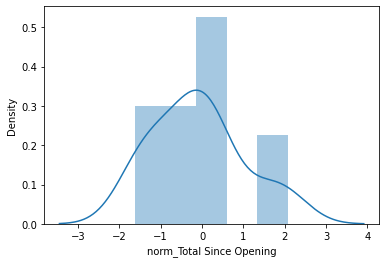

In [182]:
sns.distplot(y2_hat-y2_test)

### 3.8 Normalization for Distances Cremation dataset for Synthetic control

In [183]:
path3 = r'C:\Users\yuvem\OneDrive\Documents\GitHub\Personal-Capstone-Projects\Capstone-Traditional-vs-Nontraditional-Burial-Analysis\Datasets\sheet1_table_of_cremations.csv'
xl3_dist = pd.read_csv(path3)
xl3_dist.head()

,Crematoria,Crematoria2,Direct Cremations 2019,1 Jan-31 Dec 2019,1 Jan-31 Dec 2020,Buffer,Crematoria Point 1,Crematoria Point 2,Direct Cremations 2020,Distance,Distance Label,January 2020 Basic Cremation Fee in pounds,January 2021 Basic Cremation Fee in pounds,Latitude,Latitude2,Longtitude,Longtitude2,Total Crematorium Charges in pounds,Total for County 2020,Total Since Opening
0,Bedford,Widnes,60,1744,1824,Polygon,Point,Point,52.0,LineString,207.679607,810.8,849.95,52.155162,53.380609,-0.411665,-2.732648,944.5,NaN,85432
1,Luton,Whimple (East Devon),N/R,1565,1884,Polygon,Point,Point,243.0,LineString,242.517542,760.0,780.00,51.911291,50.758470,-0.389880,-3.343787,780.0,3708.0,128685
2,Bracknell,Weymouth,32,2009,2396,Polygon,Point,Point,218.0,LineString,147.290578,875.0,900.00,51.391328,50.612301,-0.780324,-2.477066,900.0,NaN,69774
3,Reading,Westerleigh,74,1646,1898,Polygon,Point,Point,167.0,LineString,102.432956,810.0,830.00,51.475829,51.504766,-0.955201,-2.429303,873.5,NaN,135794
4,Slough,West Berkshire (Thatcham),N/R,1358,1368,Polygon,Point,Point,59.0,LineString,45.962630,795.0,835.00,51.523431,51.401052,-0.592800,-1.224472,835.0,NaN,89237


In [184]:
xl3_dist.dtypes

Crematoria                                     object
Crematoria2                                    object
Direct Cremations 2019                         object
1 Jan-31 Dec 2019                               int64
1 Jan-31 Dec 2020                               int64
Buffer                                         object
Crematoria Point 1                             object
Crematoria Point 2                             object
Direct Cremations 2020                        float64
Distance                                       object
Distance Label                                float64
January 2020 Basic Cremation Fee in pounds    float64
January 2021 Basic Cremation Fee in pounds    float64
Latitude                                      float64
Latitude2                                     float64
Longtitude                                    float64
Longtitude2                                   float64
Total Crematorium Charges in pounds           float64
Total for County 2020       

In [185]:
xl3_dist.sum().isnull()

Crematoria                                    False
Crematoria2                                   False
Direct Cremations 2019                        False
1 Jan-31 Dec 2019                             False
1 Jan-31 Dec 2020                             False
Buffer                                        False
Crematoria Point 1                            False
Crematoria Point 2                            False
Direct Cremations 2020                        False
Distance                                      False
Distance Label                                False
January 2020 Basic Cremation Fee in pounds    False
January 2021 Basic Cremation Fee in pounds    False
Latitude                                      False
Latitude2                                     False
Longtitude                                    False
Longtitude2                                   False
Total Crematorium Charges in pounds           False
Total for County 2020                         False
Total Since 

In [186]:
xl3_dist.isnull().sum()

Crematoria                                     0
Crematoria2                                    0
Direct Cremations 2019                         0
1 Jan-31 Dec 2019                              0
1 Jan-31 Dec 2020                              0
Buffer                                         0
Crematoria Point 1                             0
Crematoria Point 2                             0
Direct Cremations 2020                         2
Distance                                       0
Distance Label                                 0
January 2020 Basic Cremation Fee in pounds     1
January 2021 Basic Cremation Fee in pounds     0
Latitude                                       0
Latitude2                                      0
Longtitude                                     0
Longtitude2                                    0
Total Crematorium Charges in pounds            0
Total for County 2020                         49
Total Since Opening                            0
dtype: int64

In [187]:
xl3_dist['Direct Cremations 2020'].unique()

array([ 52., 243., 218., 167.,  59.,  78.,  54.,  23., 275., 325.,  20.,
       119., 153., 171., 150.,  64.,  22.,  75.,   1., 140., 143.,  72.,
       465.,  14., 517.,   0., 164., 158.,  89., 350.,  nan, 107.,  74.,
       266.,  42., 105., 175., 100., 586.,  49., 751., 573.,  80.,  60.,
        39.,  95.,  29., 284., 196., 203., 154., 124., 128., 200., 347.,
       259.,  69.,  98.,   7.])

In [188]:
xl3_dist = xl3_dist[xl3_dist['Direct Cremations 2020'].notna()] # clean nulls
xl3_dist.isna().sum()

Crematoria                                     0
Crematoria2                                    0
Direct Cremations 2019                         0
1 Jan-31 Dec 2019                              0
1 Jan-31 Dec 2020                              0
Buffer                                         0
Crematoria Point 1                             0
Crematoria Point 2                             0
Direct Cremations 2020                         0
Distance                                       0
Distance Label                                 0
January 2020 Basic Cremation Fee in pounds     1
January 2021 Basic Cremation Fee in pounds     0
Latitude                                       0
Latitude2                                      0
Longtitude                                     0
Longtitude2                                    0
Total Crematorium Charges in pounds            0
Total for County 2020                         47
Total Since Opening                            0
dtype: int64

In [189]:
xl3_dist = xl3_dist[xl3_dist['January 2020 Basic Cremation Fee in pounds'].notna()] # clean nulls
xl3_dist.isna().sum()

Crematoria                                     0
Crematoria2                                    0
Direct Cremations 2019                         0
1 Jan-31 Dec 2019                              0
1 Jan-31 Dec 2020                              0
Buffer                                         0
Crematoria Point 1                             0
Crematoria Point 2                             0
Direct Cremations 2020                         0
Distance                                       0
Distance Label                                 0
January 2020 Basic Cremation Fee in pounds     0
January 2021 Basic Cremation Fee in pounds     0
Latitude                                       0
Latitude2                                      0
Longtitude                                     0
Longtitude2                                    0
Total Crematorium Charges in pounds            0
Total for County 2020                         46
Total Since Opening                            0
dtype: int64

In [190]:
# import packages
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import cosine_similarity

In [191]:
# create subset
xl3_dist_subset = xl3_dist.drop(['Crematoria2','Direct Cremations 2019','Buffer','Crematoria Point 1','Crematoria Point 2','Distance','Total for County 2020'], axis=1)
xl3_dist_subset.head()

,Crematoria,1 Jan-31 Dec 2019,1 Jan-31 Dec 2020,Direct Cremations 2020,Distance Label,January 2020 Basic Cremation Fee in pounds,January 2021 Basic Cremation Fee in pounds,Latitude,Latitude2,Longtitude,Longtitude2,Total Crematorium Charges in pounds,Total Since Opening
0,Bedford,1744,1824,52.0,207.679607,810.8,849.95,52.155162,53.380609,-0.411665,-2.732648,944.5,85432
1,Luton,1565,1884,243.0,242.517542,760.0,780.00,51.911291,50.758470,-0.389880,-3.343787,780.0,128685
2,Bracknell,2009,2396,218.0,147.290578,875.0,900.00,51.391328,50.612301,-0.780324,-2.477066,900.0,69774
3,Reading,1646,1898,167.0,102.432956,810.0,830.00,51.475829,51.504766,-0.955201,-2.429303,873.5,135794
4,Slough,1358,1368,59.0,45.962630,795.0,835.00,51.523431,51.401052,-0.592800,-1.224472,835.0,89237


In [192]:
xl3_dist_subset.shape

(60, 13)

In [193]:
# Create new dataframe 
xl3_dist_ = xl3_dist_subset.set_index('Crematoria')
# Save Crematoria labels
xl3_index = xl3_dist_.index
# Save column names
xl3_columns = xl3_dist_.columns
xl3_dist_.head()

,1 Jan-31 Dec 2019,1 Jan-31 Dec 2020,Direct Cremations 2020,Distance Label,January 2020 Basic Cremation Fee in pounds,January 2021 Basic Cremation Fee in pounds,Latitude,Latitude2,Longtitude,Longtitude2,Total Crematorium Charges in pounds,Total Since Opening
Crematoria,,,,,,,,,,,,
Bedford,1744,1824,52.0,207.679607,810.8,849.95,52.155162,53.380609,-0.411665,-2.732648,944.5,85432
Luton,1565,1884,243.0,242.517542,760.0,780.00,51.911291,50.758470,-0.389880,-3.343787,780.0,128685
Bracknell,2009,2396,218.0,147.290578,875.0,900.00,51.391328,50.612301,-0.780324,-2.477066,900.0,69774
Reading,1646,1898,167.0,102.432956,810.0,830.00,51.475829,51.504766,-0.955201,-2.429303,873.5,135794
Slough,1358,1368,59.0,45.962630,795.0,835.00,51.523431,51.401052,-0.592800,-1.224472,835.0,89237


In [194]:
xl3_dist_.shape

(60, 12)

#### MinMaxScaler

In [195]:
minmax_scaler = MinMaxScaler(feature_range=(0,1))
minmax_scaler = minmax_scaler.fit(xl3_dist_)
norm_minmax = minmax_scaler.transform(xl3_dist_)
for i in range(10):
    print(norm_minmax[i])

[0.50730051 0.43678526 0.06924101 0.35902674 0.59175705 0.67230603
 0.41390762 0.67663332 0.76312354 0.40209636 0.83641975 0.3953739 ]
[0.44651952 0.45584498 0.32356858 0.42637999 0.48156182 0.52155172
 0.36162371 0.11446835 0.7665122  0.30703414 0.49794239 0.5980609 ]
[0.59728353 0.61848793 0.29027963 0.24227479 0.73101952 0.78017241
 0.25014787 0.08313083 0.70577897 0.44185197 0.74485597 0.32199927]
[0.47402377 0.46029225 0.22237017 0.15555018 0.59002169 0.62931034
 0.26826416 0.27446802 0.67857691 0.44928153 0.69032922 0.63137424]
[0.3762309  0.29193139 0.07856192 0.04637437 0.55748373 0.64008621
 0.27846955 0.25223252 0.7349481  0.63669207 0.61111111 0.41320443]
[0.29779287 0.27096569 0.10386152 0.28545196 0.99132321 0.98491379
 0.25223252 0.35088372 0.63669207 1.         0.94032922 0.0675967 ]
[0.36332767 0.33163914 0.07190413 0.65098961 0.76355748 0.86637931
 0.27228071 0.95079519 0.41851572 0.57627542 0.82716049 0.62348288]
[0.56434635 0.43964422 0.03062583 0.37459122 0.76355748

### Z-score normalized values with StandardScaler

In [196]:
scaler_us = StandardScaler()
scaler_us = scaler_us.fit(xl3_dist_)
normalized_us = scaler_us.transform(xl3_dist_)
for i in range(10):
    print(normalized_us[i])

[ 0.25841744  0.07935301 -0.71980501 -0.26456062 -0.24250318 -0.01598179
 -0.10082907  0.84014894  0.76375093 -0.70744516  0.67969939  0.17079102]
[-0.02758867  0.17283169  0.51692144  0.01915162 -0.71223702 -0.67878383
 -0.277729   -1.12645132  0.77766365 -1.09791459 -0.84369158  0.92261905]
[ 0.6818343   0.97051639  0.35504625 -0.75635517  0.35113684  0.45826042
 -0.65490188 -1.23607817  0.52831313 -0.54414843  0.26759667 -0.10137792]
[ 0.10183309  0.19464338  0.02482086 -1.12166547 -0.24990056 -0.20501539
 -0.59360632 -0.56673059  0.41663049 -0.51363142  0.02218718  1.04618841]
[-0.35833316 -0.63108493 -0.67447995 -1.581547   -0.3886015  -0.15763855
 -0.55907689 -0.64451617  0.64807191  0.25616005 -0.33435113  0.23692992]
[-0.72742484 -0.73391147 -0.55145481 -0.57447985  1.46074434  1.35842044
 -0.64784856 -0.29940845  0.24466518  1.74845257  1.14736653 -1.04503482]
[-0.41904954 -0.43633769 -0.70685499  0.96527525  0.48983777  0.83727516
 -0.58001654  1.79923896 -0.65109462  0.00799

#### Mean subtracted normalization

In [197]:
normalized_u = np.zeros(shape=(60,13))
for i in range(2):
    t_xl3_dist_ = xl3_dist_.iloc[:,i]
    t_xl3_dist_s = t_xl3_dist_.mean()
    normalized_u[:,i]=xl3_dist_.iloc[:,i]-t_xl3_dist_s
print(normalized_u)

[[  161.73333333    50.93333333     0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.        ]
 [  -17.26666667   110.93333333     0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.        ]
 [  426.73333333   622.93333333     0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.        ]
 [   63.73333333   124.93333333     0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.        ]
 [ -224.26666667  -405.06666667     0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.        ]
 [ -455.26666667  -471.06666667     0.             0.
      0.             0.             0.        

#### Euclidean distance

In [198]:
y = xl3_dist_.iloc[:,:]
print("Finding euclidean distance")
print(y)
dist_euclidean = DistanceMetric.get_metric('euclidean')
dmax_euclidean = dist_euclidean.pairwise(y)
dmin_euclidean = dist_euclidean.pairwise(y)
print("Euclidean distance")
print(dmax_euclidean)


Finding euclidean distance
                               1 Jan-31 Dec 2019  1 Jan-31 Dec 2020  \
Crematoria                                                            
Bedford                                     1744               1824   
Luton                                       1565               1884   
Bracknell                                   2009               2396   
Reading                                     1646               1898   
Slough                                      1358               1368   
West Berkshire (Thatcham)                   1127               1302   
Bristol (Canford)                           1320               1493   
Bristol (South)                             1912               1833   
Westerleigh                                 2632               3211   
Amersham (Chilterns)                        3195               3597   
Aylesbury Vale                               377                762   
Bierton                                      279  

#### Manhattan distance

In [199]:
dist_manhattan = DistanceMetric.get_metric('manhattan')
dmax_manhattan = dist_manhattan.pairwise(y)
dmin_manhattan = dist_manhattan.pairwise(y)
print('\t Manhattan distance')
print(dmax_manhattan)

	 Manhattan distance
[[     0.          44006.58686848  16884.29541137 ...  93899.19329229
  132106.53252528  32253.2610166 ]
 [ 44006.58686848      0.          60344.150261   ...  50883.73786454
   89391.14772077  75563.10374787]
 [ 16884.29541137  60344.150261        0.         ... 108979.03924858
  146870.37562614  17730.87262818]
 ...
 [ 93899.19329229  50883.73786454 108979.03924858 ...      0.
   38568.75897995 125785.84632997]
 [132106.53252528  89391.14772077 146870.37562614 ...  38568.75897995
       0.         164354.60530992]
 [ 32253.2610166   75563.10374787  17730.87262818 ... 125785.84632997
  164354.60530992      0.        ]]


#### Cosine Similarity

In [200]:
print('Cosine similarity')
dmax_cosine = cosine_similarity(y)
dmin_cosine = cosine_similarity(y)
print(dmax_cosine)

Cosine similarity
[[1.         0.9999161  0.99986707 ... 0.99989985 0.99990679 0.99990456]
 [0.9999161  1.         0.99959913 ... 0.99999504 0.99999213 0.99964962]
 [0.99986707 0.99959913 1.         ... 0.9995719  0.99959637 0.99995247]
 ...
 [0.99989985 0.99999504 0.9995719  ... 1.         0.99999881 0.99962163]
 [0.99990679 0.99999213 0.99959637 ... 0.99999881 1.         0.99963816]
 [0.99990456 0.99964962 0.99995247 ... 0.99962163 0.99963816 1.        ]]


In [201]:
# Euclidean
dmax_euclidean[np.diag_indices_from(dmax_euclidean)]=-np.inf
dmax_euclidean = dmax_euclidean

dmin_euclidean[np.diag_indices_from(dmin_euclidean)] = np.inf
dmin_euclidean = dmin_euclidean

print("Euclidean distance max/t")
print(dmax_euclidean)
print('Euclidean distance min/t')
print(dmin_euclidean)

result1_euclidean = np.zeros(shape=(10,2))
result2_euclidean = np.zeros(shape=(10,2))
for i in range(10):
    min1=min(dmin_euclidean[:,i])
    gmin = np.argmin(dmin_euclidean[:,i])
    max1 = max(dmax_euclidean[:,i])
    gmax = np.argmax(dmax_euclidean[:,i])
    result1_euclidean[i,0] = min1
    result1_euclidean[i,1] = max1
    result2_euclidean[i,0] = gmin
    result2_euclidean[i,1] = gmax
    
print("Euclidean distance results")
print("Euclidean distance results min-max values")
print(result1_euclidean)
print("Euclidean distance results min-max number of")
print(result2_euclidean)

Euclidean distance max/t
[[           -inf  43254.24702712  15671.95556322 ...  92395.78236421
  129040.15486983  31429.4921415 ]
 [ 43254.24702712            -inf  58915.33688582 ...  49148.71152873
   85796.54060823  74681.01176138]
 [ 15671.95556322  58915.33688582            -inf ... 108049.7621979
  144689.94055061  15805.59753508]
 ...
 [ 92395.78236421  49148.71152873 108049.7621979  ...            -inf
   36648.84381419 123824.14233714]
 [129040.15486983  85796.54060823 144689.94055061 ...  36648.84381419
             -inf 160468.51684397]
 [ 31429.4921415   74681.01176138  15805.59753508 ... 123824.14233714
  160468.51684397            -inf]]
Euclidean distance min/t
[[            inf  43254.24702712  15671.95556322 ...  92395.78236421
  129040.15486983  31429.4921415 ]
 [ 43254.24702712             inf  58915.33688582 ...  49148.71152873
   85796.54060823  74681.01176138]
 [ 15671.95556322  58915.33688582             inf ... 108049.7621979
  144689.94055061  15805.59753508]
 

In [202]:

# Manhattan distance

dmax_manhattan[np.diag_indices_from(dmax_manhattan)] = -np.inf
dmax_manhattan = dmax_manhattan

dmin_manhattan[np.diag_indices_from(dmin_manhattan)] = np.inf
dmin_manhattan = dmin_manhattan
print("Manhattan distance max")
print(dmin_manhattan)

result1_manhattan = np.zeros(shape=(10,2))
result2_manhattan = np.zeros(shape=(10,2))
for i in range(10):
    min1 = min(dmin_manhattan[:,i])
    gmin = np.argmin(dmin_manhattan[:,i])
    max1 = max(dmax_manhattan[:,i])
    gmax = np.argmax(dmax_manhattan[:,i])
    result1_manhattan[i,0] = min1
    result1_manhattan[i,1] = max1
    result2_manhattan[i,0] = gmin
    result2_manhattan[i,1] = gmax
    
    
print("Manhattan distance result")
print("Manhattan distance results min-max values")
print(result1_manhattan)
print("Manhattan distance results min-max positions")
print(result2_manhattan)

Manhattan distance max
[[            inf  44006.58686848  16884.29541137 ...  93899.19329229
  132106.53252528  32253.2610166 ]
 [ 44006.58686848             inf  60344.150261   ...  50883.73786454
   89391.14772077  75563.10374787]
 [ 16884.29541137  60344.150261               inf ... 108979.03924858
  146870.37562614  17730.87262818]
 ...
 [ 93899.19329229  50883.73786454 108979.03924858 ...             inf
   38568.75897995 125785.84632997]
 [132106.53252528  89391.14772077 146870.37562614 ...  38568.75897995
              inf 164354.60530992]
 [ 32253.2610166   75563.10374787  17730.87262818 ... 125785.84632997
  164354.60530992             inf]]
Manhattan distance result
Manhattan distance results min-max values
[[  1181.89060773 132106.53252528]
 [  5033.84681568 130667.45662588]
 [  3868.79296558 146870.37562614]
 [  3046.42381643 137997.53922842]
 [  3721.78003164 129145.76107957]
 [  3260.21852861 203087.1927664 ]
 [  1813.63829754 135965.94328007]
 [  1181.89060773 131012.407

In [203]:
# Cosine distance
dmax_cosine[np.diag_indices_from(dmax_cosine)] = -np.inf
dmax_cosine = dmax_cosine

dmin_cosine[np.diag_indices_from(dmin_cosine)] = np.inf
dmin_cosine = dmin_cosine
print("Cosine distance max")
print(dmax_cosine)
print("Cosine distance min")
print(dmin_cosine)

result1_cosine = np.zeros(shape=(10,2))
result2_cosine = np.zeros(shape=(10,2))
for i in range(10):
    min1 = min(dmin_cosine[:,i])
    gmin = np.argmin(dmin_cosine[:,i])
    max1 = max(dmax_cosine[:,i])
    gmax = np.argmax(dmax_cosine[:,i])
    result1_cosine[i,0] = min1
    result1_cosine[i,1] = max1
    result2_cosine[i,0] = gmin
    result2_cosine[i,1] = gmax
    
    
    
print("Cosine distance result")
print("Cosine distance results min-max values")
print(result1_cosine)
print("Cosine distance results min-max values positions")
print(result2_cosine)

Cosine distance max
[[      -inf 0.9999161  0.99986707 ... 0.99989985 0.99990679 0.99990456]
 [0.9999161        -inf 0.99959913 ... 0.99999504 0.99999213 0.99964962]
 [0.99986707 0.99959913       -inf ... 0.9995719  0.99959637 0.99995247]
 ...
 [0.99989985 0.99999504 0.9995719  ...       -inf 0.99999881 0.99962163]
 [0.99990679 0.99999213 0.99959637 ... 0.99999881       -inf 0.99963816]
 [0.99990456 0.99964962 0.99995247 ... 0.99962163 0.99963816       -inf]]
Cosine distance min
[[       inf 0.9999161  0.99986707 ... 0.99989985 0.99990679 0.99990456]
 [0.9999161         inf 0.99959913 ... 0.99999504 0.99999213 0.99964962]
 [0.99986707 0.99959913        inf ... 0.9995719  0.99959637 0.99995247]
 ...
 [0.99989985 0.99999504 0.9995719  ...        inf 0.99999881 0.99962163]
 [0.99990679 0.99999213 0.99959637 ... 0.99999881        inf 0.99963816]
 [0.99990456 0.99964962 0.99995247 ... 0.99962163 0.99963816        inf]]
Cosine distance result
Cosine distance results min-max values
[[0.627314

### Plotting attributes comparing normalization techniques.

<ipython-input-204-5aa0798f3fce>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(ric)


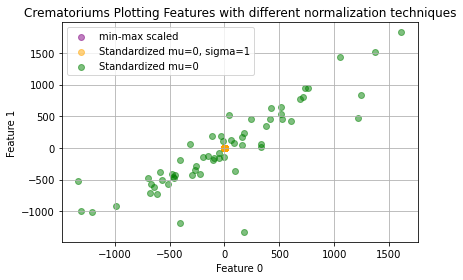

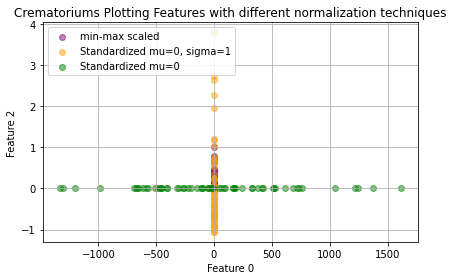

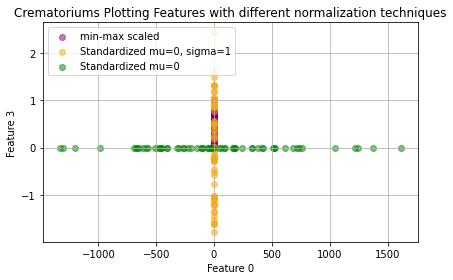

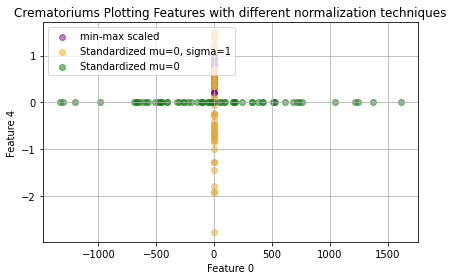

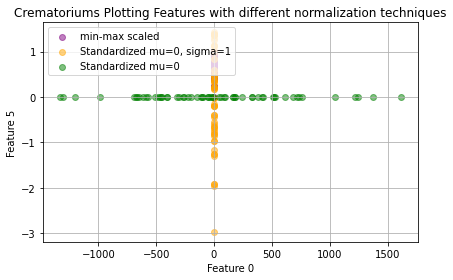

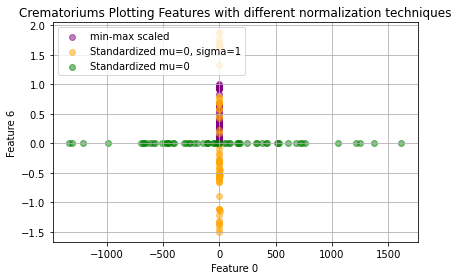

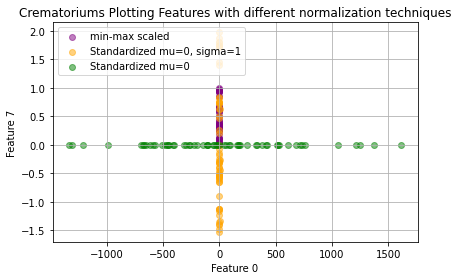

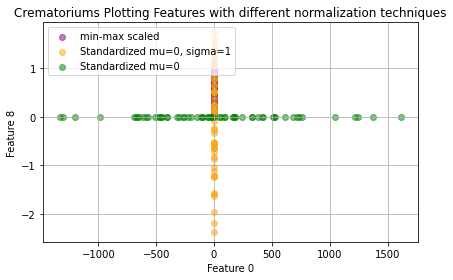

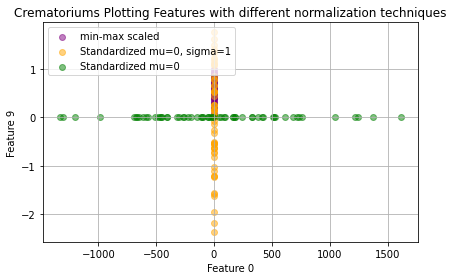

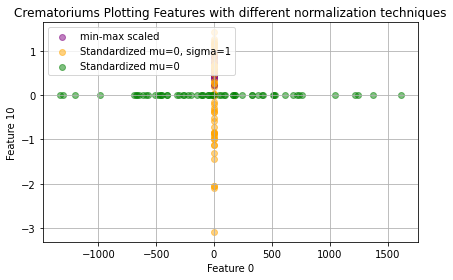

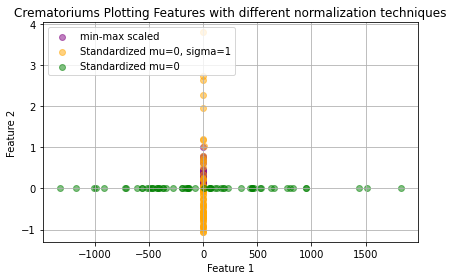

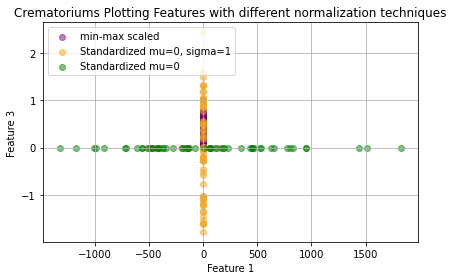

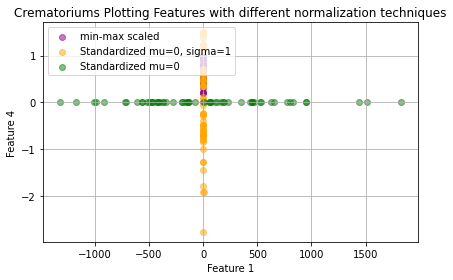

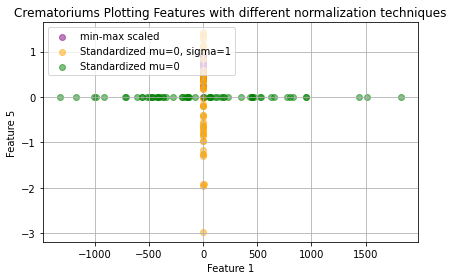

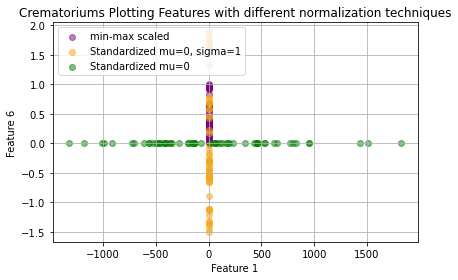

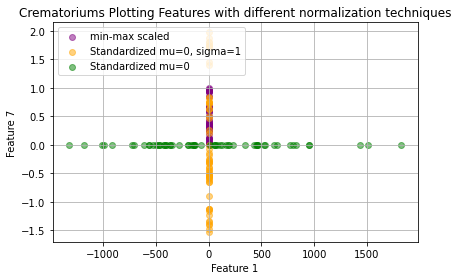

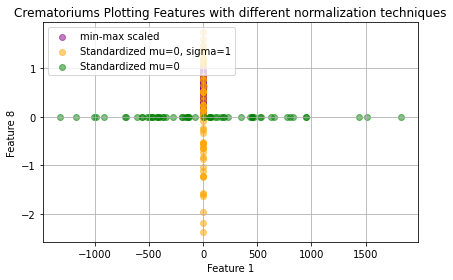

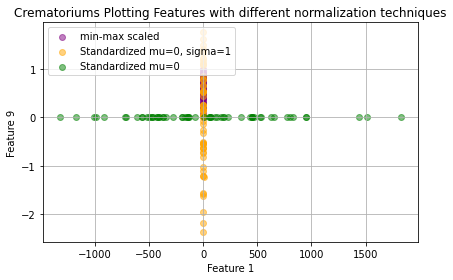

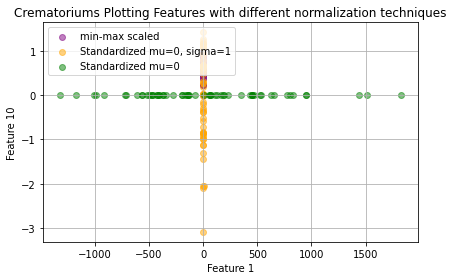

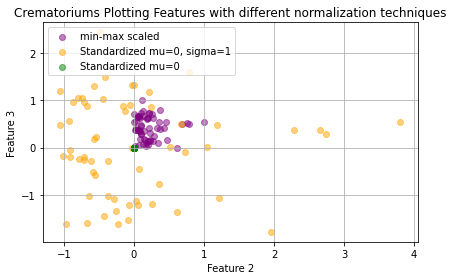

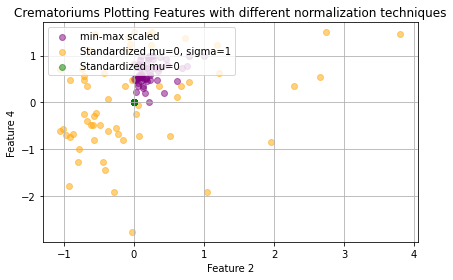

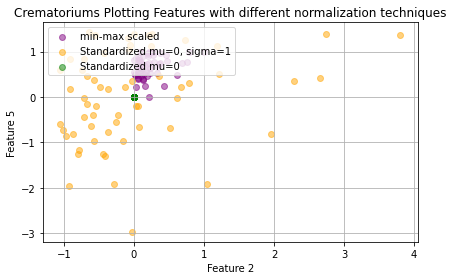

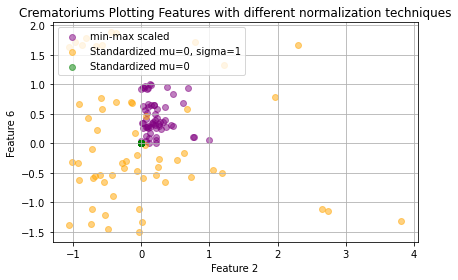

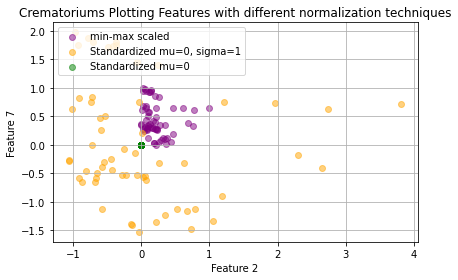

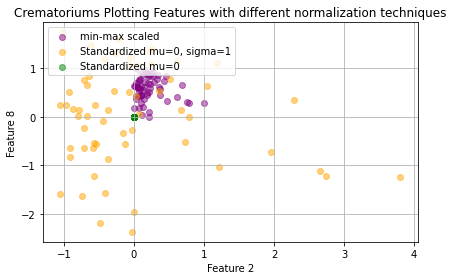

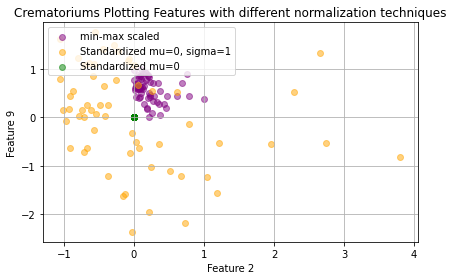

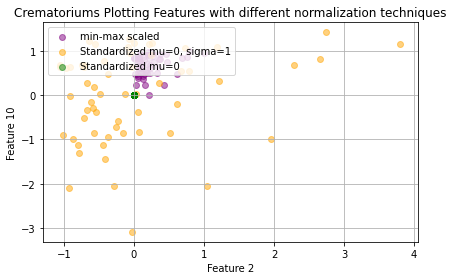

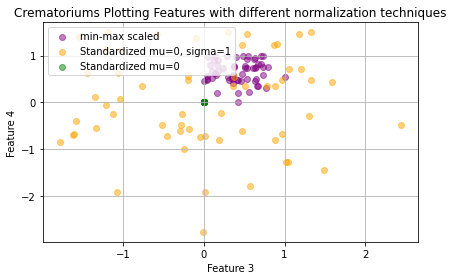

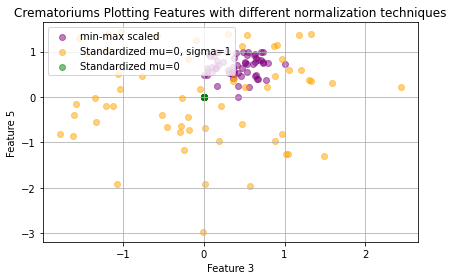

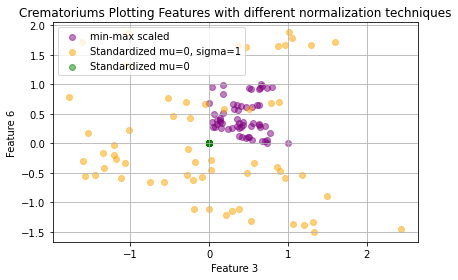

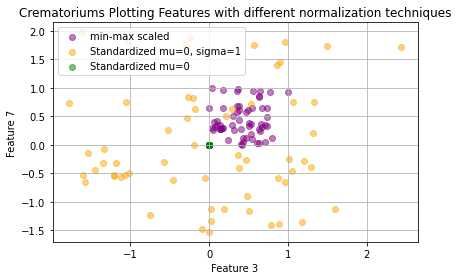

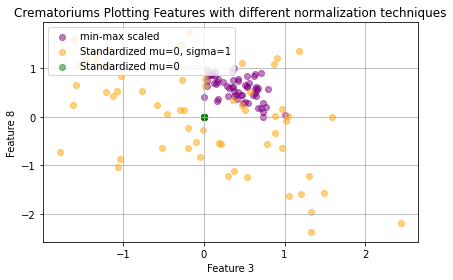

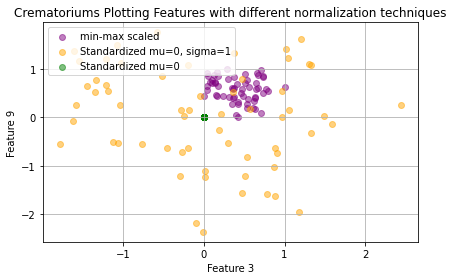

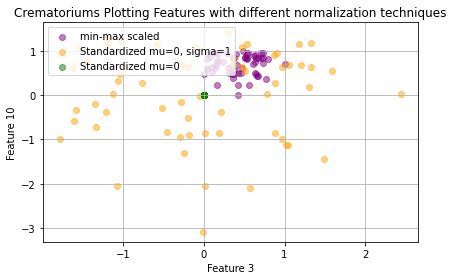

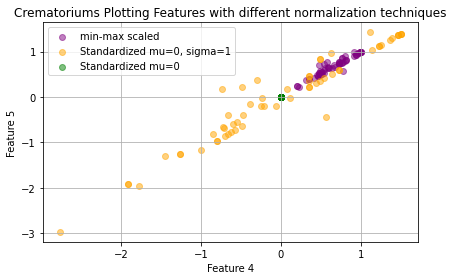

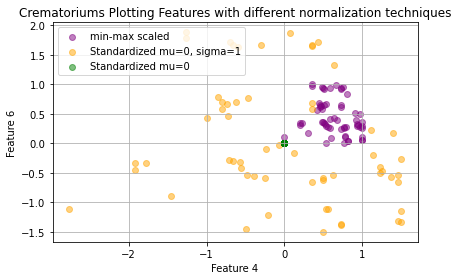

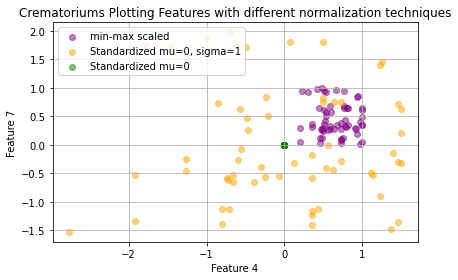

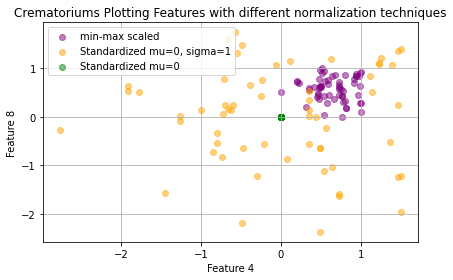

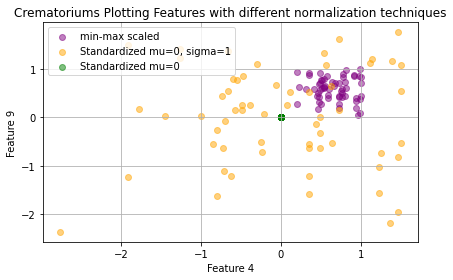

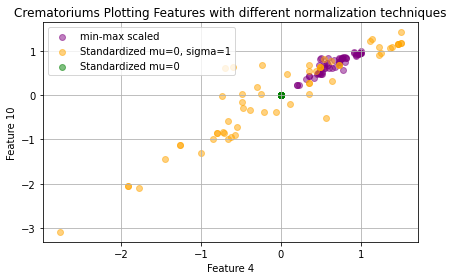

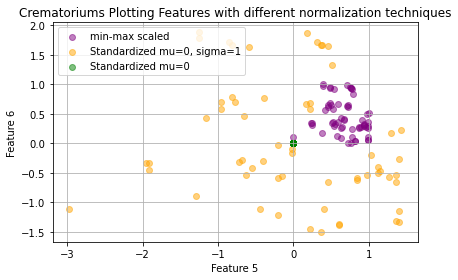

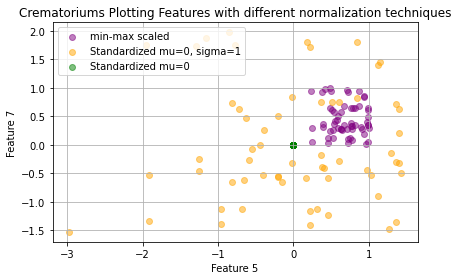

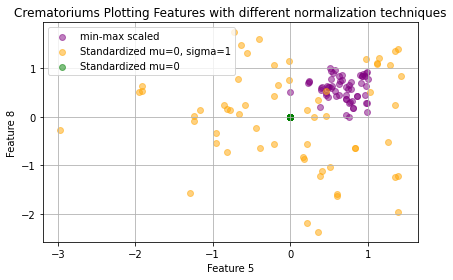

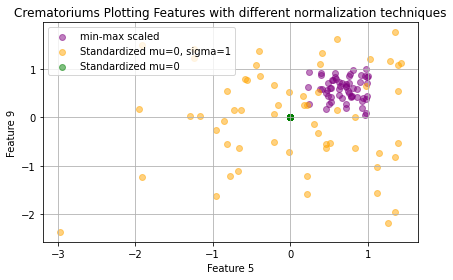

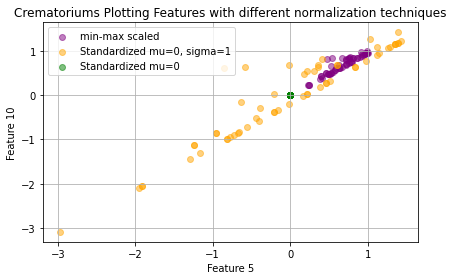

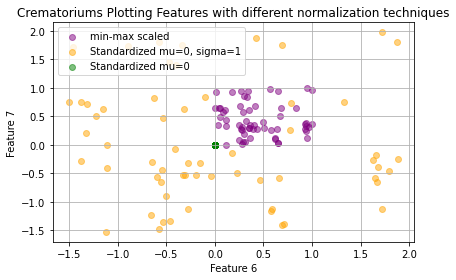

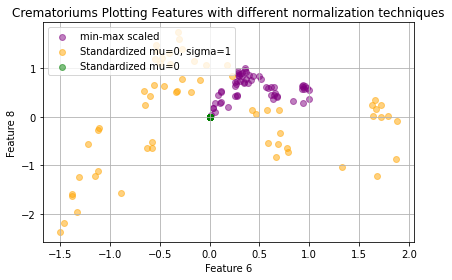

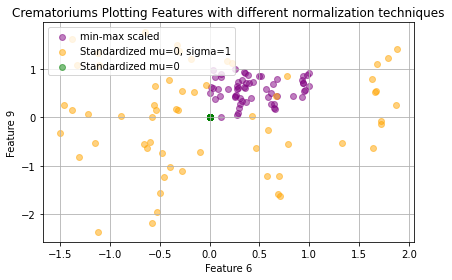

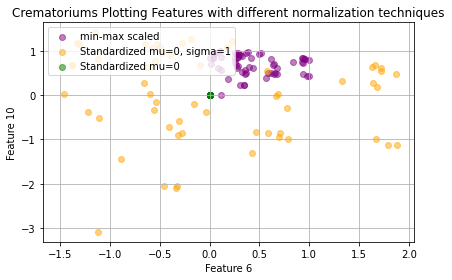

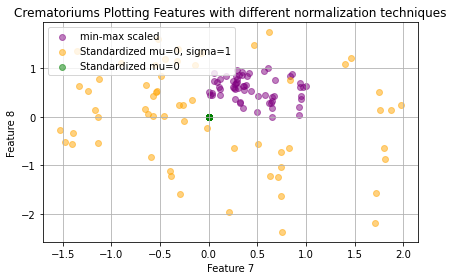

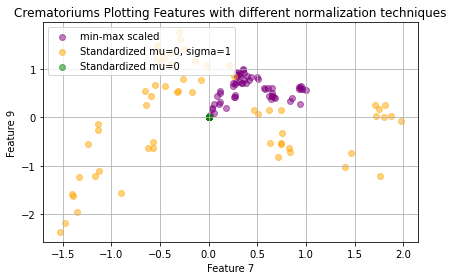

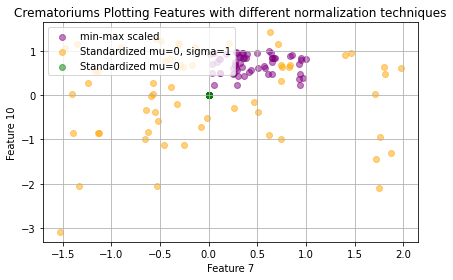

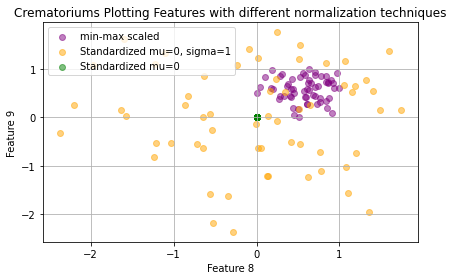

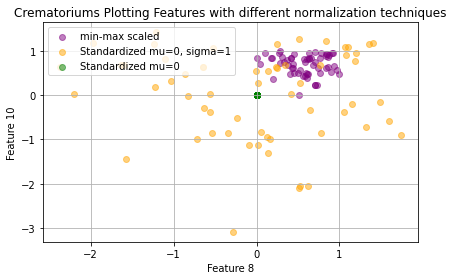

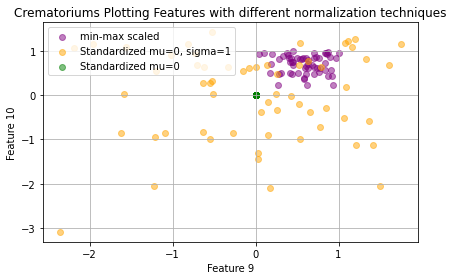

In [204]:
ric=1
for m in range(10):
    for s in range(10):
        #matrix1[m,s]= xl3_dist_.iloc[:,m].corr(xl3_dist_.iloc[:,s])
        p = m + s + 1
        if p <= 10:
            plt.figure(ric)
            plt.scatter(norm_minmax[:,m], norm_minmax[:,p], color='purple', label='min-max scaled', alpha=0.5)
            plt.scatter(normalized_us[:,m], normalized_us[:,p], color='orange', label='Standardized mu=0, sigma=1', alpha=0.5)
            plt.scatter(normalized_u[:,m], normalized_u[:,p], color='green', label='Standardized mu=0', alpha=0.5)
            plt.title('Crematoriums Plotting Features with different normalization techniques')
            plt.xlabel('Feature %s' %m)
            plt.ylabel('Feature %s' %p)
            plt.legend(loc='upper left')
            plt.grid()
            plt.tight_layout()
            ric=ric+1

In [205]:
xl3_final.to_excel(r'C:\Users\yuvem\OneDrive\Documents\GitHub\Personal-Capstone-Projects\Capstone-Traditional-vs-Nontraditional-Burial-Analysis\xl3_final.xlsx',index=False)

In [206]:
ds.to_excel(r'C:\Users\yuvem\OneDrive\Documents\GitHub\Personal-Capstone-Projects\Capstone-Traditional-vs-Nontraditional-Burial-Analysis\ds.xlsx',index=False)

In [207]:
xl3_final_train.to_excel(r'C:\Users\yuvem\OneDrive\Documents\GitHub\Personal-Capstone-Projects\Capstone-Traditional-vs-Nontraditional-Burial-Analysis\xl3_final_train.xlsx',index=False)

In [208]:
np.savetxt("norm_minmax.csv", norm_minmax, delimiter=",")

In [209]:
np.savetxt("normalized_us.csv", normalized_us, delimiter=",")

In [210]:
np.savetxt("normalized_u.csv", normalized_u, delimiter=",")

In [211]:
np.savetxt("dmax_euclidean.csv", dmax_euclidean, delimiter=",")

In [212]:
np.savetxt("dmin_euclidean.csv", dmin_euclidean, delimiter=",")

In [213]:
np.savetxt("dmax_manhattan.csv", dmax_manhattan, delimiter=",")

In [214]:
np.savetxt("dmin_manhattan.csv", dmin_manhattan, delimiter=",")

In [215]:
np.savetxt("dmax_cosine.csv", dmax_cosine, delimiter=",")

In [216]:
np.savetxt("dmin_cosine.csv", dmin_cosine, delimiter=",")

In [217]:
xl3_dist_.to_excel(r'C:\Users\yuvem\OneDrive\Documents\GitHub\Personal-Capstone-Projects\Capstone-Traditional-vs-Nontraditional-Burial-Analysis\xl3_dist_.xlsx',index=False)

In [218]:
xl3_dist.to_excel(r'C:\Users\yuvem\OneDrive\Documents\GitHub\Personal-Capstone-Projects\Capstone-Traditional-vs-Nontraditional-Burial-Analysis\xl3_dist.xlsx',index=False)